In [1]:
from dataclasses import field
from pydantic.dataclasses import dataclass
from omegaconf import OmegaConf

cfg = OmegaConf.load("../conf/base.yml")
print(cfg.aligner.preprocess)

[{'name': 'SelectRoi'}]


In [2]:
from dreidel.apps.aligner.aligner_app import Aligner
aligner = Aligner(cfg.aligner)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'SIFT_create'
> Overload resolution failed:
>  - Argument 'nfeatures' is required to be an integer
>  - SIFT_create() missing required argument 'nOctaveLayers' (pos 2)


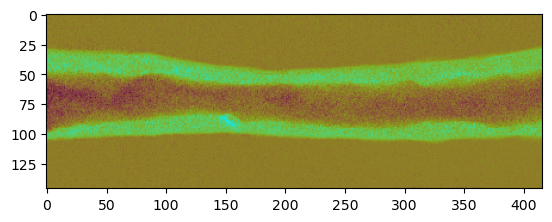

In [ ]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread("/home/thinkpad/projects/dreidel/data/processed/eels/cleaned.png")
src = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
tgt = cv2.imread("/home/thinkpad/projects/dreidel/data/processed/eels/cleaned.png")
plt.imshow(src)

In [ ]:
for preprocessor in aligner.preprocessors:
    src = preprocessor.preprocess(img=src)
    preprocessor.show()
    tgt = preprocessor.preprocess(img=tgt)
    preprocessor.show()

TypeError: 'Raw' object is not callable

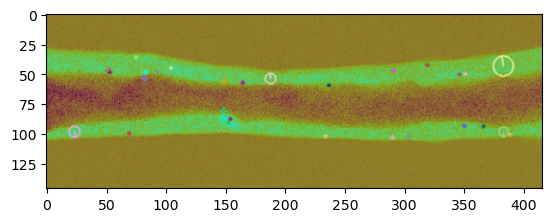

In [ ]:
import matplotlib.pyplot as plt
src_features = aligner.keypoint_detector.detect(img=src)
_ = aligner.keypoint_detector.show()

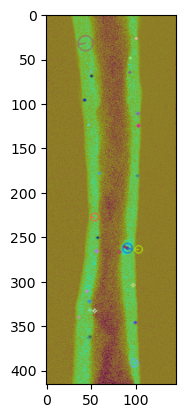

In [ ]:
tgt_features = aligner.keypoint_detector.detect(img=tgt)
_ = aligner.keypoint_detector.show()

None
None


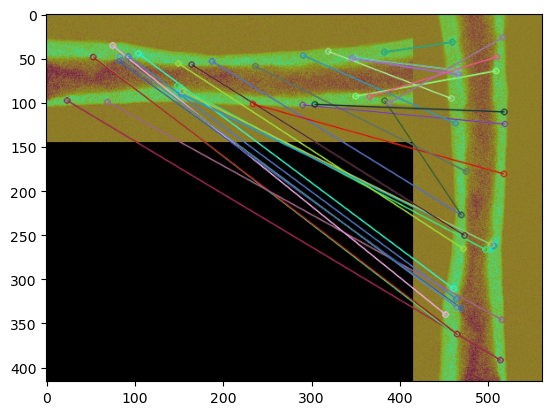

In [ ]:
matches, src_features, tgt_features = aligner.matcher.match(src, tgt, src_features, tgt_features)
aligner.matcher.show()

In [ ]:
print(f"{len(matches)=}, {type(src_features.matched_pts)=}, {len(tgt_features.matched_pts)=}")

NameError: name 'matches' is not defined

In [ ]:
transformed_img = aligner.transform.transform(src, src_features, tgt_features, tgt.shape)

error: OpenCV(4.6.0) /home/conda/feedstock_root/build_artifacts/libopencv_1671461518131/work/modules/imgproc/src/imgwarp.cpp:3399: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 3 && dst.checkVector(2, CV_32F) == 3 in function 'getAffineTransform'
